<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/Portfolio_allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install quandl

In [60]:
import pandas as pd
import quandl

In [61]:
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2021-01-01')

In [62]:
aapl = quandl.get('WIKI/AAPL.11',
                  start_date = start,
                  end_date = end)
cisco = quandl.get('WIKI/CSCO.11',
                   start_date = start,
                   end_date = end)
ibm = quandl.get('WIKI/IBM.11',
                 start_date = start,
                 end_date = end)
amzn = quandl.get('WIKI/AMZN.11',
                  start_date = start,
                  end_date = end)

LimitExceededError: ignored

In [64]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

# Allocations

In [65]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [66]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [67]:
portfolio_val = pd.concat([aapl['Position Values'],
                           cisco['Position Values'],
                           ibm['Position Values'],
                           amzn['Position Values']],
                          axis = 1)

In [68]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [69]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

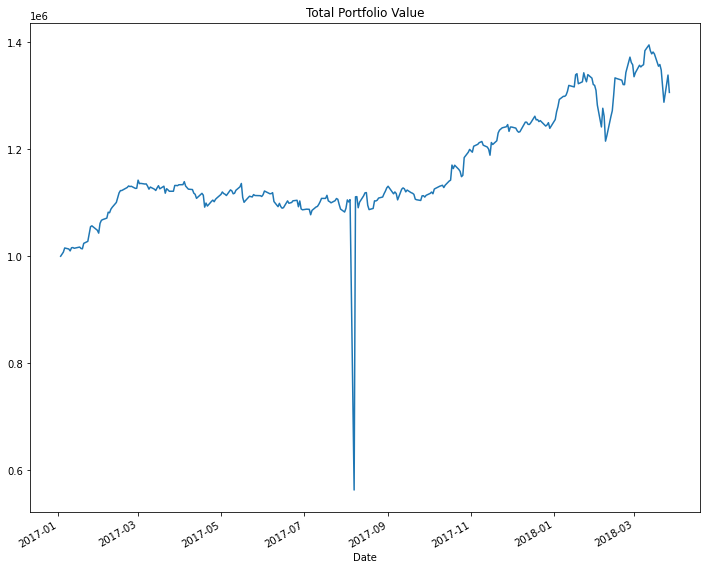

In [71]:
portfolio_val['Total Pos'].plot(figsize = (12, 10))
plt.title('Total Portfolio Value')

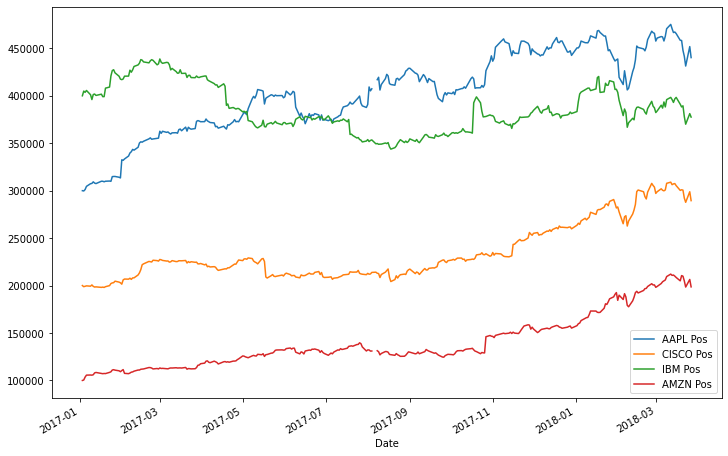

In [72]:
portfolio_val.drop('Total Pos',
                   axis = 1).plot(kind = 'line', figsize = (12, 8))

# Portfolio Stats

Daily returns

In [73]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [74]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2017-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2017-01-04,299664.227292,198821.218075,404952.449309,100465.721072,1.003904e+06,0.003904
2017-01-05,301188.118812,199283.593000,403612.656259,103553.279287,1.007638e+06,0.003720
2017-01-06,304545.845889,199679.914365,405598.420958,105615.189672,1.015439e+06,0.007743
2017-01-09,307335.342230,199349.646561,401100.544291,105738.585853,1.013524e+06,-0.001886


In [76]:
portfolio_val['Daily Return'].mean()

0.002452538205622774

In [77]:
portfolio_val['Daily Return'].std()

0.06269342381772121

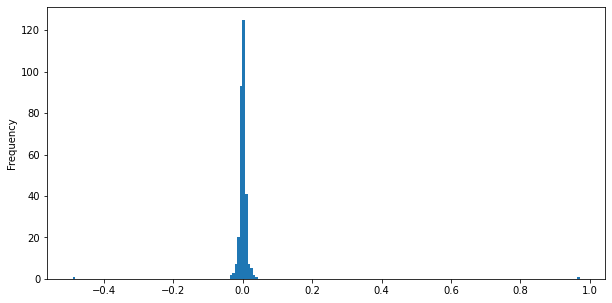

In [81]:
portfolio_val['Daily Return'].plot(kind='hist', bins=200, figsize=(10,5))

In [82]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 30.593275906786687 was percent!


Sharpe Ratio

In [83]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [84]:
SR

0.03911954486252717

In [85]:
ASR=(252**0.5)*SR   //annulised sharpe ratio

In [86]:
ASR

0.621003522649688